In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['STATE','ACCT_LEN','AREA_CD','PHONE','INTL_PLN','VM_PLN','VM_CNT','DAY_MINS','DAY_CALLS','DAY_CHG','EVE_MINS','EVE_CALLS','EVE_CHG','NITE_MINS','NITE_CALLS','NITE_CHG','INTL_MINS','INTL_CALLS','INTL_CHG','CSRV_CALLS','CHURN']
data=pd.read_csv("C:/Users/Bhaskar22/Desktop/MINIPROJECT/data/Mobile_churn_UCI.csv", names=col_names, header=0)
data.head()

,STATE,ACCT_LEN,AREA_CD,PHONE,INTL_PLN,VM_PLN,VM_CNT,DAY_MINS,DAY_CALLS,DAY_CHG,...,EVE_CALLS,EVE_CHG,NITE_MINS,NITE_CALLS,NITE_CHG,INTL_MINS,INTL_CALLS,INTL_CHG,CSRV_CALLS,CHURN
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Null values

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
STATE         3333 non-null object
ACCT_LEN      3333 non-null int64
AREA_CD       3333 non-null int64
PHONE         3333 non-null object
INTL_PLN      3333 non-null object
VM_PLN        3333 non-null object
VM_CNT        3333 non-null int64
DAY_MINS      3333 non-null float64
DAY_CALLS     3333 non-null int64
DAY_CHG       3333 non-null float64
EVE_MINS      3333 non-null float64
EVE_CALLS     3333 non-null int64
EVE_CHG       3333 non-null float64
NITE_MINS     3333 non-null float64
NITE_CALLS    3333 non-null int64
NITE_CHG      3333 non-null float64
INTL_MINS     3333 non-null float64
INTL_CALLS    3333 non-null int64
INTL_CHG      3333 non-null float64
CSRV_CALLS    3333 non-null int64
CHURN         3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


(3333, 21)

# Missing values


In [4]:
all(data.CHURN.notnull())

True

There are 3333 rows and 21 columns. All columns are populated, there are no null or missing values.

# Convert data types

In [5]:
data['STATE'] = data['STATE'].astype('category')
data['CHURN'] = data['CHURN'].apply(lambda x: 0 if x=='False.' else 1)   #---> True=1; False=0
data['INTL_PLN'] = data['INTL_PLN'].apply(lambda x: 0 if x=='no' else 1) #---> No=0; Yes=1 
data['VM_PLN'] = data['VM_PLN'].apply(lambda x: 0 if x=='no' else 1)     #---> No=0; Yes=1 

Correlation: 0.9999999521903994


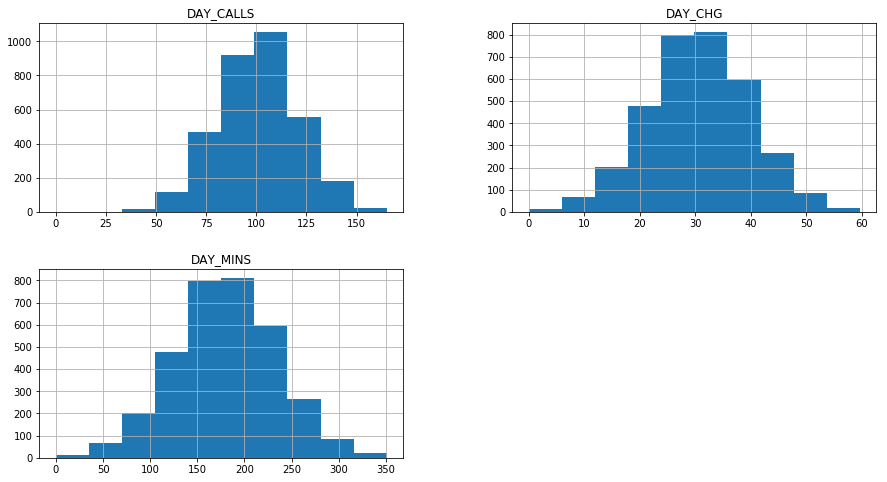

In [6]:
features=["DAY_CHG","DAY_MINS","DAY_CALLS"]
data[features].hist(figsize=(15,8))
print("Correlation:",data['DAY_CHG'].corr(data['DAY_MINS']))

Correlation: 0.9999997760198502


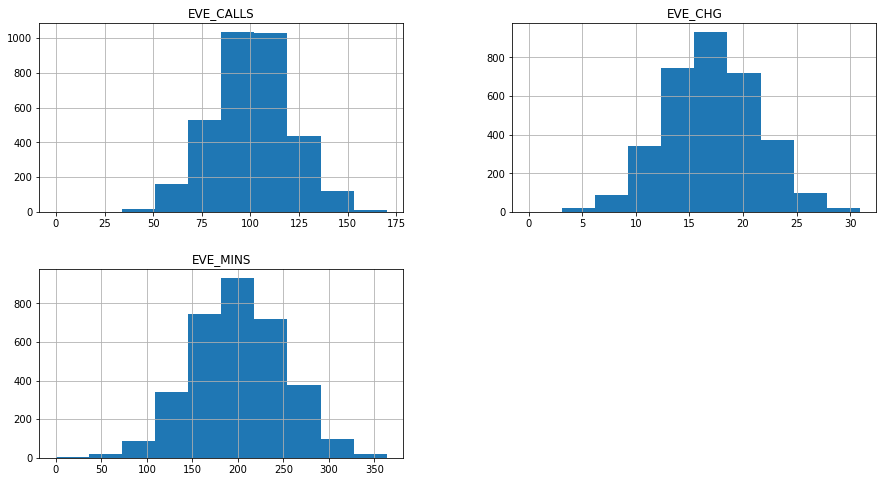

In [7]:
features=["EVE_CHG","EVE_MINS","EVE_CALLS"]
data[features].hist(figsize=(15,8))
print("Correlation:",data['EVE_MINS'].corr(data['EVE_CHG']))

Correlation: 0.9999927417510324


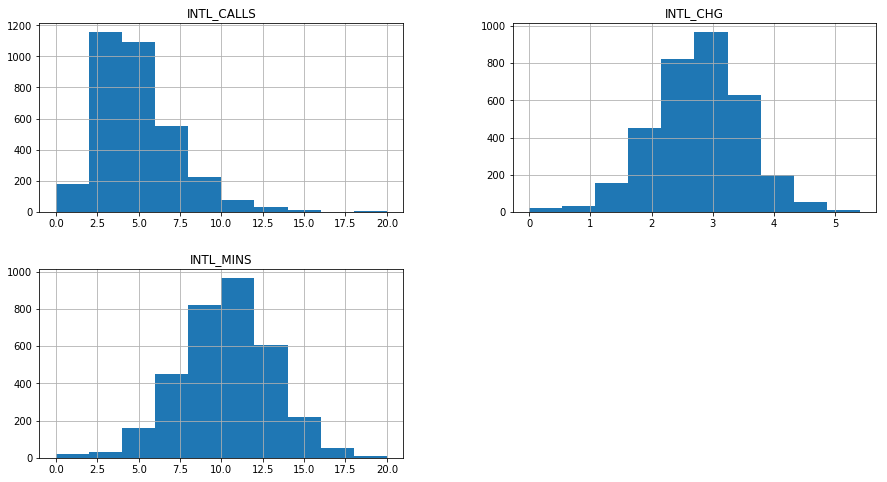

In [8]:
features=["INTL_MINS","INTL_CHG","INTL_CALLS"]
data[features].hist(figsize=(15,8))
print("Correlation:",data['INTL_MINS'].corr(data['INTL_CHG']))

In [9]:
print("Correlation:",data['VM_CNT'].corr(data['VM_PLN']))

Correlation: 0.9569266420697519


In [10]:
data.drop(['PHONE'],axis=1,inplace=True)
data.drop(['DAY_CHG'],axis=1,inplace=True)
data.drop(['EVE_CHG'],axis=1,inplace=True)
data.drop(['INTL_CHG'],axis=1,inplace=True)
data.drop(['NITE_CHG'],axis=1,inplace=True)
#data.drop(['VM_CNT'],axis=1,inplace=True)

data.drop(['STATE'],axis=1,inplace=True)
data.drop(['AREA_CD'],axis=1,inplace=True)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
ACCT_LEN      3333 non-null int64
INTL_PLN      3333 non-null int64
VM_PLN        3333 non-null int64
VM_CNT        3333 non-null int64
DAY_MINS      3333 non-null float64
DAY_CALLS     3333 non-null int64
EVE_MINS      3333 non-null float64
EVE_CALLS     3333 non-null int64
NITE_MINS     3333 non-null float64
NITE_CALLS    3333 non-null int64
INTL_MINS     3333 non-null float64
INTL_CALLS    3333 non-null int64
CSRV_CALLS    3333 non-null int64
CHURN         3333 non-null int64
dtypes: float64(4), int64(10)
memory usage: 364.6 KB


,ACCT_LEN,INTL_PLN,VM_PLN,VM_CNT,DAY_MINS,DAY_CALLS,EVE_MINS,EVE_CALLS,NITE_MINS,NITE_CALLS,INTL_MINS,INTL_CALLS,CSRV_CALLS,CHURN
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [11]:
data.to_csv('C:/Users/Bhaskar22/Desktop/MINIPROJECT/data/Mobile_churn_UCI_Cleaned.csv')